In [1]:
from keras.layers.core import Dense,Activation,Dropout
from keras.layers.recurrent import SimpleRNN,LSTM
from keras.models import Sequential

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import lstm,time

Using TensorFlow backend.


## Step 1 - Load Data

In [2]:
x_train, y_train, x_test, y_test = lstm.load_data('sp500_close.csv',50,True)

## Step 2 - Build Model

In [3]:
model = Sequential()

model.add(LSTM(input_dim=1,output_dim=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim=1))
model.add(Activation('linear'))

In [4]:
start = time.time()
model.compile(loss='mse',optimizer='rmsprop')
print('Compilation time : ', time.time() - start)

Compilation time :  0.038111209869384766


## Step 3 - Train the model

In [5]:
model.fit(x_train,y_train,batch_size=512,nb_epoch=1,validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 11s - loss: 0.0029 - val_loss: 0.0010


## Step 4 - Plot the predictions

yo


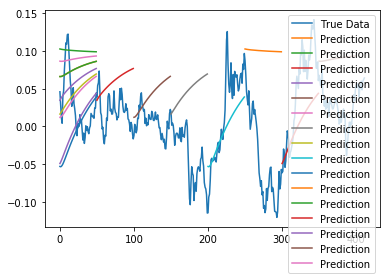

In [10]:
predictions = lstm.predict_sequences_multiple(model,x_test,50,50)
lstm.plot_results_multiple(predicted_data=predictions,true_data=y_test,prediction_len=50)

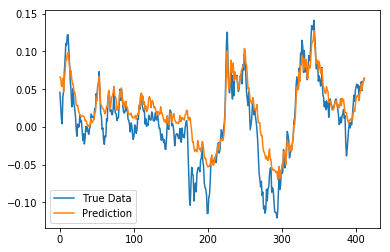

In [11]:
predictions_point_by_point = lstm.predict_point_by_point(model,x_test)
lstm.plot_results(predicted_data=predictions_point_by_point,true_data=y_test)